In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

In [114]:
f = '/glade/u/home/djk2120/'+'AMF_USUMB_2006_L2_WG_V004.nc'
obs = xr.open_dataset(f)

In [115]:
f = ('/glade/u/home/djk2120/UMBS_default/output/'+
     'clm50d30wspinsp_US-UMB_I1PtClm50SpGs.clm2.h1.2006.nc')
mdl = xr.open_dataset(f)

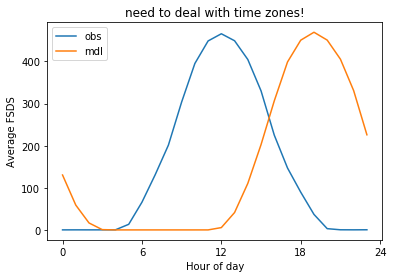

In [116]:
obs2 = obs.swap_dims({'DTIME':'HRMIN'})
ix = obs2['Rg']>-10
od = obs2['Rg'][ix].groupby('HRMIN').mean(dim=xr.ALL_DIMS).values
mdl2 = mdl.swap_dims({'time':'mcsec'})
md = mdl2['FSDS'].groupby('mcsec').mean(dim=xr.ALL_DIMS).values

plt.plot(od)
plt.plot(md)
plt.xticks(6*np.arange(5))
plt.xlabel('Hour of day')
plt.ylabel('Average FSDS')
plt.legend(['obs','mdl'])
plt.title('need to deal with time zones!');


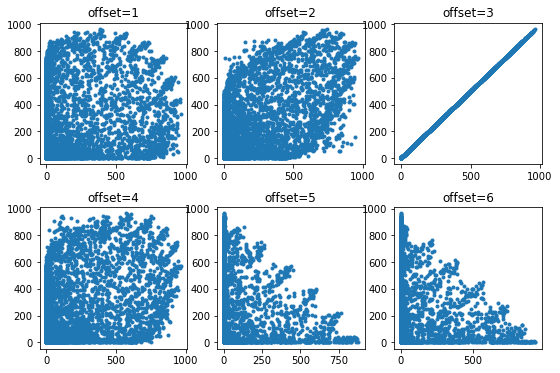

In [113]:
x=mdl['FSDS'].copy(deep=True).values
y=obs['Rg'].values
ix = y>0
plt.figure(figsize=[9,6])
for i in 1+np.arange(6):
    plt.subplot(2,3,i)
    tmp = x[i:]
    x[-i:] = np.nan
    x[:-i]=tmp
    plt.plot(x[ix],y[ix],'.');
    plt.title('offset='+str(i))
plt.subplots_adjust(hspace=0.3);

In [51]:
def get_mdl_var(v,offset):
    x = mdl[v].copy(deep=True).values
    tmp = x[i:]
    x[-i:] = np.nan
    x[:-i]=tmp
    return x.ravel()

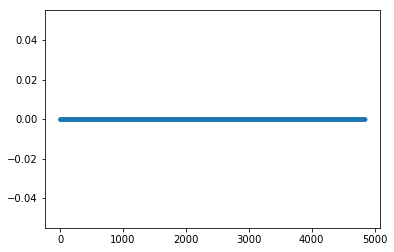

In [52]:
offset = 3
fsds = get_mdl_var('FSDS',offset)
y=obs['Rg'].values
ix = y>0
plt.plot(fsds[ix]-y[ix],'.');

In [53]:
gpp = get_mdl_var('FPSN',offset)

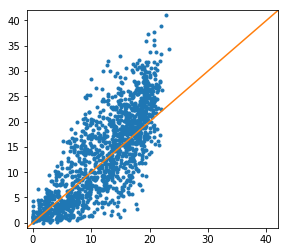

In [59]:
y = obs['GPP'].values
ix = y>0
plt.figure(figsize=[4.5,4])
plt.plot(gpp[ix],y[ix],'.')
plt.xlim([-1,42])
plt.ylim([-1,42])
plt.plot([-1,42],[-1,42]);

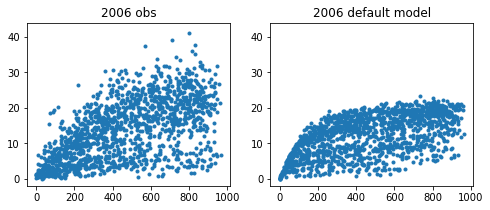

In [69]:
x = obs['Rg'].values
y = obs['GPP'].values
ix = np.logical_and(x>0,y>0)

plt.figure(figsize=[8,3])
plt.subplot(121)
plt.plot(x[ix],y[ix],'.')
plt.ylim([-2,44])
plt.title('2006 obs')

y = get_mdl_var('FPSN',offset)
plt.subplot(122)
plt.plot(x[ix],y[ix],'.')
plt.ylim([-2,44])
plt.title('2006 default model');

In [71]:
x = 1
y = x
y = 2
print(y)

2


In [72]:
print(x)

1


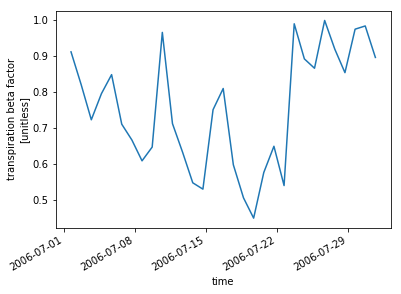

In [104]:
x = xr.open_dataset(f)
ix = np.logical_and(x['time.month']==7,x['mcsec']==61200)
x['BTRAN'][ix].plot();

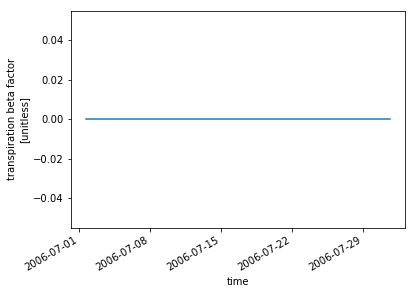

In [105]:
tmp = x['BTRAN']
tmp[:]=0
tmp[ix].plot();

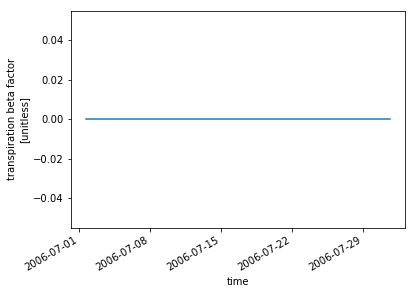

In [106]:
x['BTRAN'][ix].plot();